In [98]:
import matplotlib.pyplot as plt
import torch
curves2 = []
import glob
curves2 = [torch.load(f) for f in glob.glob("results/affine_3x3_manyruns*/curves.trch")]

make_matrix_stepXXone_step
make_matrix_stepXXtwo_step
make_matrix_stepXXtwo_step_consistent
make_exp_stepXXone_step
make_exp_stepXXtwo_step
make_exp_stepXXtwo_step_consistent
make_consistent_stepXXone_step
make_consistent_stepXXtwo_step
make_consistent_stepXXtwo_step_consistent


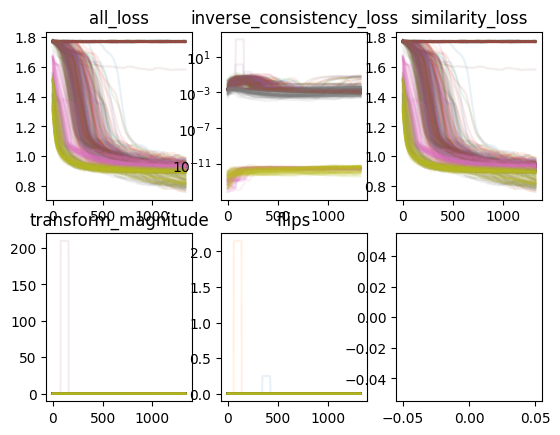

In [99]:
experiments = list(curves2[0].keys())
for j, experiment_name in enumerate(experiments):
    for i, metric_name in enumerate(curves2[0][experiments[0]][0]._fields):

        plt.subplot(2, 3, i + 1)
        for curves in curves2:


                prop_cycle = plt.rcParams['axes.prop_cycle']
                colors = prop_cycle.by_key()['color']
                color = colors[j]
                data = torch.tensor([getattr(val,metric_name) for val in curves[experiment_name]])
                data = torch.nn.functional.conv1d(data[None], torch.ones((1, 1, 80)) / 80)[0]

                plt.plot(data, c=color, alpha=.1)

        if metric_name == "inverse_consistency_loss":
            plt.yscale("log")





        plt.title(metric_name)
    plt.subplot(2, 3, 6)
    plt.plot([[0 for y in experiment_name]])
    #plt.legend([e[5:].split("_stepXX")[0] +" " +e.split("XX")[1] for e in experiments])
    print(experiment_name)
plt.show()



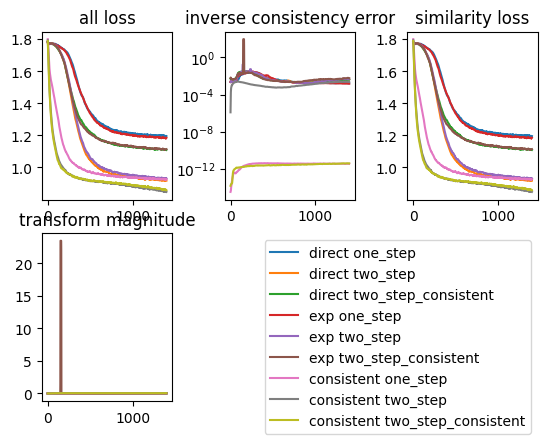

In [101]:
experiments = list(curves2[0].keys())
for i, metric_name in enumerate(curves2[0][experiments[0]][0]._fields):

    
    if metric_name != "flips":
        plt.subplot(2, 3, i + 1)


        for j, experiment_name in enumerate(experiments):

            prop_cycle = plt.rcParams['axes.prop_cycle']
            colors = prop_cycle.by_key()['color']
            color = colors[j]

            ddata = torch.tensor([0])

            for curves in curves2:

                data = torch.tensor([getattr(val,metric_name) for val in curves[experiment_name]])
                data = torch.nn.functional.conv1d(data[None], torch.ones((1, 1, 11)) / 11)[0]

                ddata = data + ddata
            ddata = ddata / len(curves2)
            
            #if "matrix" in experiment_name or "exp" in experiment_name:
            #    ddata = ddata[::2]
            #else:
            #    ddata = ddata[:len(ddata) // 2]

            plt.plot(ddata, c=color)

        if metric_name == "inverse_consistency_loss":
            plt.yscale("log")
            metric_name = "inverse_consistency_error"

        plt.title(metric_name.replace("_", " "))
plt.subplot(2, 3, 6)
plt.xticks([])
plt.yticks([])
plt.plot([[0 for y in experiment_name]])
plt.box(False)
plt.legend([("direct" if "matrix" in e[5:].split("_stepXX")[0] else e[5:].split("_stepXX")[0]) +" " +e.split("XX")[1] for e in experiments])
plt.subplots_adjust(wspace=.4)

In [102]:
len(curves2)

65

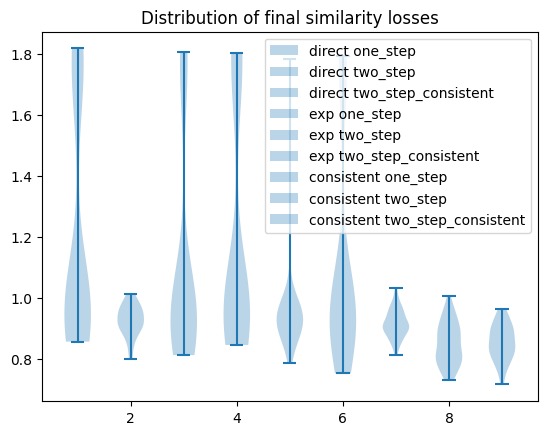

In [103]:
experiments = list(curves2[0].keys())
metric_name = "similarity_loss"

dddata = []
for j, experiment_name in enumerate(experiments):

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    color = colors[j]

    ddata = []

    for curves in curves2:

        data = [getattr(val,metric_name) for val in curves[experiment_name]][-1]

        ddata.append(data)

    dddata.append(ddata)

plt.violinplot(dddata, bw_method="silverman")
if metric_name == "inverse_consistency_loss":
    plt.yscale("log")
    metric_name = "inverse_consistency_error"

plt.title("Distribution of final similarity losses")

plt.legend([("direct" if "matrix" in e[5:].split("_stepXX")[0] else e[5:].split("_stepXX")[0]) +" " +e.split("XX")[1] for e in experiments])
plt.subplots_adjust(wspace=.4)

In [96]:
plt.violinplot?

In [76]:
import seaborn as sns